In [1]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
model = Autoencoder()
model = model.to("mps")

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
start_time = time.time()

# 학습 과정
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data 
        img = img.to('mps')
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()


    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

end_time = time.time()

# 학습 시간 계산
training_time = end_time - start_time
print(f"모델 학습 시간: {training_time:.2f} 초")

Epoch [1/10], Loss: 0.0202


Epoch [2/10], Loss: 0.0136


Epoch [3/10], Loss: 0.0131


Epoch [4/10], Loss: 0.0093


Epoch [5/10], Loss: 0.0095


Epoch [6/10], Loss: 0.0086


Epoch [7/10], Loss: 0.0090


Epoch [8/10], Loss: 0.0071


Epoch [9/10], Loss: 0.0083


Epoch [10/10], Loss: 0.0067
모델 학습 시간: 65.95 초


In [6]:
with torch.no_grad():
    test_images, _ = next(iter(test_loader))
    decoded_images = model(test_images.to('mps'))

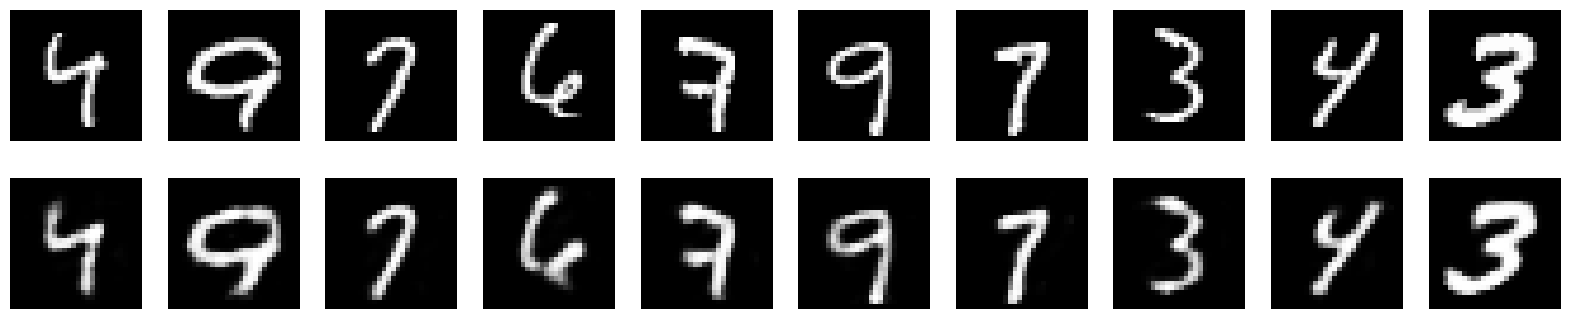

In [9]:
import matplotlib.pyplot as plt

decoded_images = decoded_images.to('cpu')

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].view(28, 28), cmap='gray')
    plt.axis('off')
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].view(28, 28), cmap='gray')
    plt.axis('off')

plt.show()
